# <div> <center> AID311 Math for Data Science Project Phase 2 </center> </div>
## Movie Production Analysis & Prediction

## Student Credentials:
- Name: Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Section: AID 3
- Group: 1
- E-mail: yousef.gomaa@ejust.edu.eg

## Problem Introduction:

In this notebook, we explore various aspects of movie production and promotion, aiming to uncover patterns and insights that can contribute to the success of a film.
Each column provides valuable information that could hold the key to understanding the dynamics of a movie's performance.

The task is to analyze this dataset and build a predictive model that can help stakeholders make informed decisions about movie production and marketing strategies. 

Some of the models used being:
- Naive Bayesian
- Bayesian Belief Network
- Decision Tree (Entropy, and error estimation)
- LDA
- PCA
- K-NN (Different distances)
  
But, before doing so, some preprocessing operations may be required in order to prepare the data so that it could be used in the machine learning process.

Finally, each model is evaluated in terms of accuracy and other metrics to find the best suited one for said task.

In [554]:
# Libraries needed:
# Pre-processing:
# Pandas
import pandas as pd
import scipy.stats as stats

# Data Visualization:
# Standard Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


## Data Description:

In [555]:
df = pd.read_csv("Movie.xls")

In [556]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


The dataset comprises key parameters such as:
- Marketing Expense
  - The amount of money spent on promotional activities and advertising for the movie.
- Production Expense
  - The cost incurred in the creation and production of the movie, including expenses related to filming, sets, and equipment.
- Multiplex Coverage
  - The percentage or number of multiplex cinemas where the movie is being screened.
- Budget
  - The total financial investment allocated for the movie, encompassing both production and marketing expenses.
- Movie Length
  - The duration of the movie in terms of running time, typically measured in minutes.
- Lead Actor Rating
  - The rating or popularity score assigned to the main male actor in the movie.
- Lead Actress Rating
  - The rating or popularity score assigned to the main female actress in the movie.
- Director Rating
  - The rating or reputation score given to the director of the movie.
- Producer Rating
  - The rating or reputation score assigned to the producer(s) of the movie.
- Critic Rating
  - The evaluation score given by movie critics, reflecting the overall quality and performance of the film.
- Trailer Views
  - The number of views the movie trailer has received on various platforms.
- 3D Availability
  - Indicates whether the movie is available in 3D format or not.
- Time Taken
  - The duration of time taken from the start of production to the release of the movie.
- Twitter Hashtags
  - The hashtags associated with the movie on Twitter, reflecting social media trends and discussions.
- Genre
  - The category or type of the movie, such as action, drama, comedy, etc.
- Average Age of Actors
  - The average age of all the actors in the movie.
- Number of Multiplexes
  - The total count of multiplex cinemas where the movie is being screened.
- and Collection
  - The total revenue generated by the movie, typically measured in terms of box office earnings.

### Data Preprocessing:

In [557]:
df.shape

(506, 18)

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [559]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing expense,506.0,92.270471,172.030902,20.1264,21.64090,25.1302,93.54165,1799.524
Production expense,506.0,77.273557,13.720706,55.9200,65.38000,74.3800,91.20000,110.480
Multiplex coverage,506.0,0.445305,0.115878,0.1290,0.37600,0.4620,0.55100,0.615
Budget,506.0,34911.144022,3903.038232,19781.3550,32693.95250,34488.2175,36793.54250,48772.900
Movie_length,506.0,142.074901,28.148861,76.4000,118.52500,151.0000,167.57500,173.500
Lead_ Actor_Rating,506.0,8.014002,1.054266,3.8400,7.31625,8.3075,8.86500,9.435
Lead_Actress_rating,506.0,8.185613,1.054290,4.0350,7.50375,8.4950,9.03000,9.540
Director_rating,506.0,8.019664,1.059899,3.8400,7.29625,8.3125,8.88375,9.425
Producer_rating,506.0,8.190514,1.049601,4.0300,7.50750,8.4650,9.03000,9.635
Critic_rating,506.0,7.810870,0.659699,6.6000,7.20000,7.9600,8.26000,9.400


In [560]:
df.skew(numeric_only=True)

Marketing expense       5.223149
Production expense      0.295022
Multiplex coverage     -0.729308
Budget                  0.403612
Movie_length           -0.598963
Lead_ Actor_Rating     -1.010577
Lead_Actress_rating    -1.007492
Director_rating        -1.003848
Producer_rating        -1.004680
Critic_rating           0.176139
Trailer_views          -0.843831
Time_taken             -0.473481
Twitter_hastags        13.790552
Avg_age_actors          0.012971
Num_multiplex           0.534221
Collection              1.110912
dtype: float64

In [561]:
df.kurtosis(numeric_only=True)

Marketing expense       37.130509
Production expense      -1.233540
Multiplex coverage      -0.064667
Budget                   1.891500
Movie_length            -0.967716
Lead_ Actor_Rating       0.497728
Lead_Actress_rating      0.472927
Director_rating          0.458464
Producer_rating          0.503435
Critic_rating           -0.751736
Trailer_views            0.489241
Time_taken               1.113759
Twitter_hastags        214.232263
Avg_age_actors          -1.199662
Num_multiplex           -0.121132
Collection               1.516783
dtype: float64

In [562]:
df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [563]:
df.duplicated().sum()

0

In [564]:
df[df['Time_taken'].isna()]

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
20,45.0358,71.28,0.462,30941.350,171.6,8.035,8.205,7.955,8.210,7.80,371051,YES,NaN,302.176,Action,44,484,27200
58,23.0890,65.26,0.547,34135.475,102.7,6.010,6.115,5.965,6.280,7.06,480067,NO,NaN,283.728,Comedy,22,438,46600
60,22.9864,65.26,0.547,31891.255,139.7,6.335,6.420,6.235,6.560,7.06,465689,NO,NaN,222.992,Thriller,30,439,37400
104,22.7920,72.12,0.480,34257.685,163.5,8.685,8.875,8.660,8.935,6.82,432081,YES,NaN,203.216,Comedy,20,458,40200
105,22.6524,72.12,0.480,32502.305,170.2,8.905,9.025,8.935,8.925,6.82,430817,YES,NaN,263.120,Comedy,57,515,39000
215,23.9604,76.18,0.511,34341.010,115.9,7.925,8.095,8.020,8.065,7.28,456943,YES,NaN,244.000,Drama,30,480,50000
260,30.8022,62.94,0.353,40012.665,155.3,8.940,9.025,8.815,8.995,9.40,483080,YES,NaN,225.408,Drama,21,681,67600
359,105.2262,91.20,0.230,33952.160,154.8,8.610,8.810,8.720,8.845,6.96,437945,NO,NaN,283.616,Drama,26,743,45200
403,516.0340,91.20,0.307,29713.695,169.5,9.125,9.310,9.060,9.100,6.96,384237,YES,NaN,301.328,Thriller,40,677,16600
416,236.6840,91.20,0.321,37674.010,164.3,9.050,9.230,8.980,9.100,7.96,335532,YES,NaN,201.200,Thriller,35,647,15000


In [565]:
df.fillna(df.mean(numeric_only=True), inplace=True) # Fill numerical data with average. (i.e: 'Time_taken')
df.isna().sum()
# No more missing values.

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

In [566]:
df.cov(numeric_only=True)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
Marketing expense,2.959463e+04,959.693552,-8.391878,-1.472117e+05,1.708106e+03,68.928324,68.886921,69.299991,67.975385,-20.993696,-5.257621e+06,136.673773,243.662995,127.450800,7.011489e+03,-1.230783e+06
Production expense,9.596936e+02,188.257770,-1.214147,-2.097520e+04,2.490278e+02,10.219447,10.241019,10.289825,10.164691,-2.277047,-5.594712e+05,6.691969,-1.205652,9.582362,1.032301e+03,-1.221445e+05
Multiplex coverage,-8.391878e+00,-1.214147,0.013428,1.366722e+02,-2.385927e+00,-0.093895,-0.094036,-0.094467,-0.093028,0.011127,4.642967e+03,0.127252,0.059270,-0.133556,-1.128037e+01,9.135588e+02
Budget,-1.472117e+05,-20975.197451,136.672162,1.523371e+07,-2.639697e+04,-857.797596,-839.367228,-835.254004,-841.435814,598.289460,1.620754e+08,4880.401553,12544.144993,-3159.743000,-1.173664e+05,4.990880e+07
Movie_length,1.708106e+03,249.027806,-2.385927,-2.639697e+04,7.923584e+02,22.165423,22.153726,22.287321,22.061512,-4.045057,-1.143251e+06,-17.250975,27.664256,26.488137,2.017071e+03,-1.954011e+05
Lead_ Actor_Rating,6.892832e+01,10.219447,-0.093895,-8.577976e+02,2.216542e+01,1.111477,1.109173,1.114884,1.100001,-0.118219,-3.562165e+04,1.240404,1.597638,0.485419,7.918189e+01,-4.866461e+03
Lead_Actress_rating,6.888692e+01,10.241019,-0.094036,-8.393672e+02,2.215373e+01,1.109173,1.111528,1.115314,1.099948,-0.115450,-3.542404e+04,1.237966,1.131100,0.501403,7.939962e+01,-4.829873e+03
Director_rating,6.929999e+01,10.289825,-0.094467,-8.352540e+02,2.228732e+01,1.114884,1.115314,1.123385,1.105936,-0.116516,-3.553329e+04,1.175922,1.119079,0.550022,7.994676e+01,-4.800884e+03
Producer_rating,6.797539e+01,10.164691,-0.093028,-8.414358e+02,2.206151e+01,1.100001,1.099948,1.105936,1.101663,-0.115637,-3.529360e+04,0.931302,0.643354,0.427421,7.851763e+01,-4.784121e+03
Critic_rating,-2.099370e+01,-2.277047,0.011127,5.982895e+02,-4.045057e+00,-0.118219,-0.115450,-0.116516,-0.115637,0.435203,1.039518e+04,-0.301125,-1.635117,-0.411089,-9.032870e+00,4.134690e+03


#### Z-Test

In [567]:
import scipy.stats as stats
import numpy as np

num = 15
population_mean = df['Collection'].mean()
sample_mean = df['Collection'].sample(num).mean()
population_std = df['Collection'].std()

# Z-score
z_score = (sample_mean-population_mean)/(population_std/np.sqrt(num))
print('Z-Score :',z_score)

alpha = 0.05
# Critical Z-Score
z_critical = stats.norm.ppf(1-alpha)
print('Critical Z-Score :',z_critical)

# Hypothesis
if z_score > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

p_value = 1-stats.norm.cdf(z_score)

print('p-value :',p_value)

# Hypothesis
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")


Z-Score : -1.5728067811657345
Critical Z-Score : 1.6448536269514722
Fail to Reject Null Hypothesis
p-value : 0.9421182175029797
Fail to Reject Null Hypothesis


#### ANOVA

In [568]:
f_statistic, p_value = stats.f_oneway(df['Lead_ Actor_Rating'], df['Lead_Actress_rating'], df['Director_rating'], df['Producer_rating'], df['Critic_rating'])
print("F Statistic:", f_statistic)
print("P-value:", p_value)

a = 0.05
if p_value < a:
    print("Reject the null hypothesis.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference between the means.")


F Statistic: 12.610774279494422
P-value: 3.671096649089372e-10
Reject the null hypothesis.


#### Conclusion:
- Data types are correctly casted.
- Missing values found in the data given, which are in turn replaced with mean values since it is float64 type.
- No duplicated records.

### Data Visualization:

### Numerical Data Visualization:

array([[<Axes: title={'center': 'Marketing expense'}>,
        <Axes: title={'center': 'Production expense'}>,
        <Axes: title={'center': 'Multiplex coverage'}>,
        <Axes: title={'center': 'Budget'}>],
       [<Axes: title={'center': 'Movie_length'}>,
        <Axes: title={'center': 'Lead_ Actor_Rating'}>,
        <Axes: title={'center': 'Lead_Actress_rating'}>,
        <Axes: title={'center': 'Director_rating'}>],
       [<Axes: title={'center': 'Producer_rating'}>,
        <Axes: title={'center': 'Critic_rating'}>,
        <Axes: title={'center': 'Trailer_views'}>,
        <Axes: title={'center': 'Time_taken'}>],
       [<Axes: title={'center': 'Twitter_hastags'}>,
        <Axes: title={'center': 'Avg_age_actors'}>,
        <Axes: title={'center': 'Num_multiplex'}>,
        <Axes: title={'center': 'Collection'}>]], dtype=object)

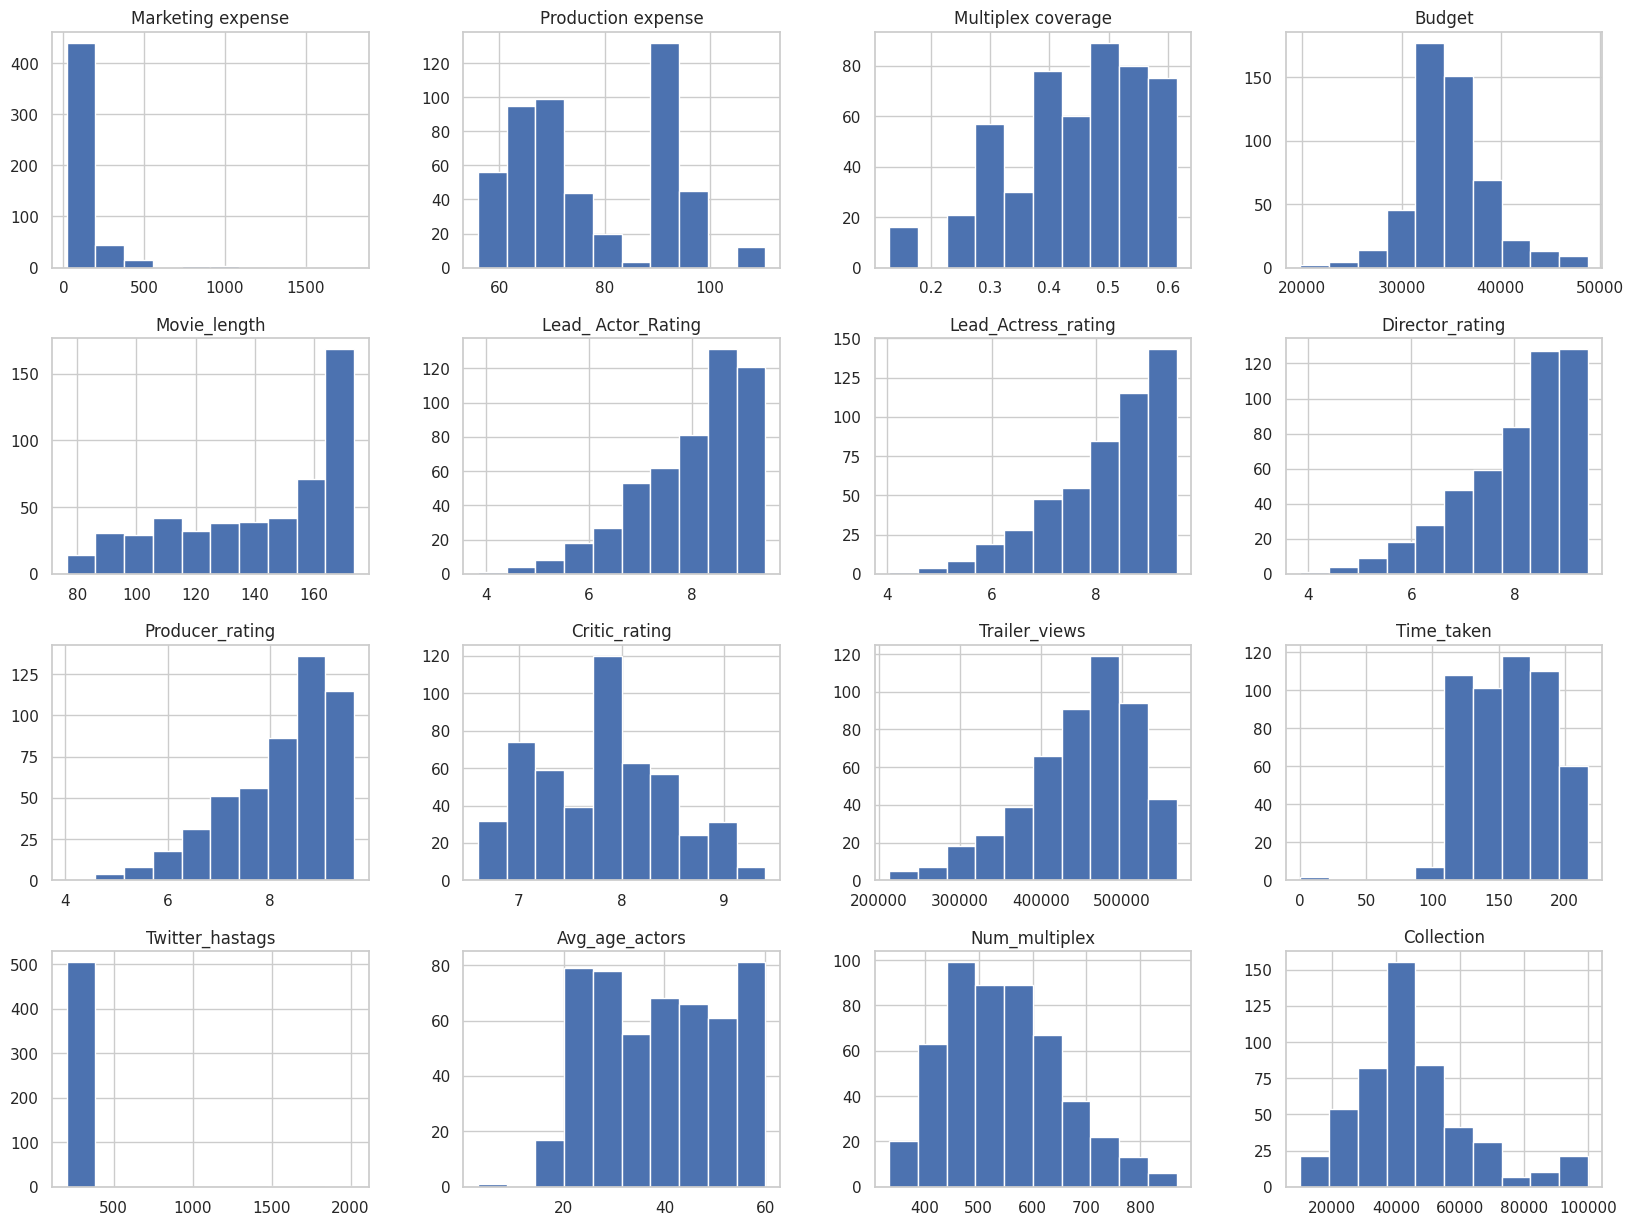

In [569]:
df.hist(figsize=(20,15))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


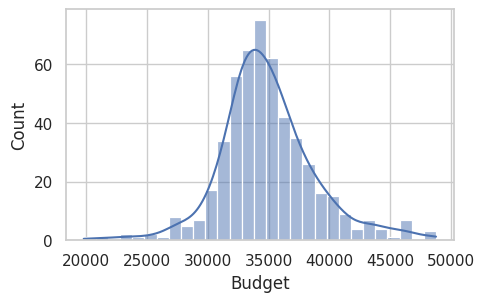

In [570]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='Budget', kde = True)
plt.show()

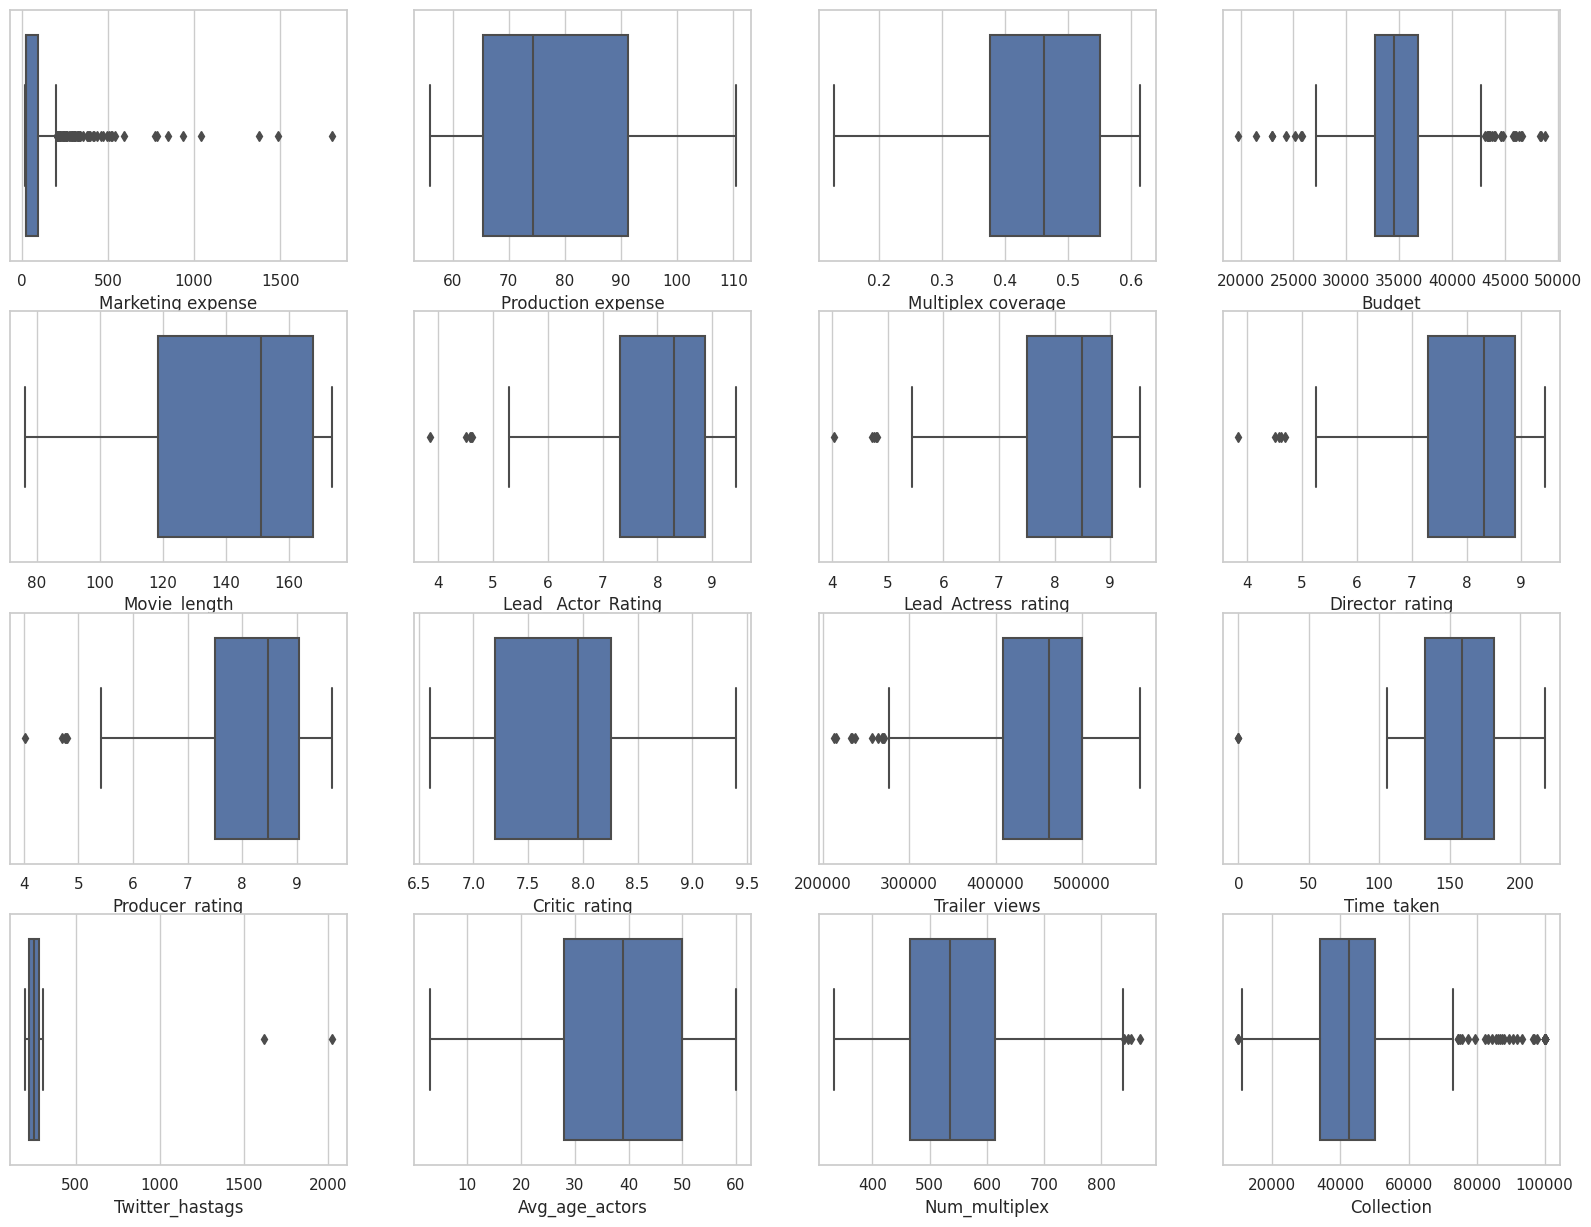

In [571]:
x = df.drop(['3D_available','Genre'],axis = 1)
# 16 columns without the categorical ones ^^
plt.figure(figsize=(20,15))
for idx,i in enumerate(x.columns):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(x = i, data = x)
    plt.xlabel(i)
plt.show()

### Categorical Data Visualization:

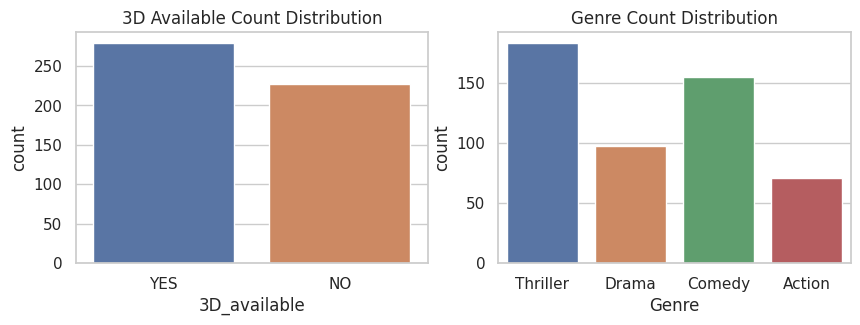

In [572]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
sns.countplot(x = '3D_available',data=df)
plt.title("3D Available Count Distribution")
plt.subplot(1,2,2)
sns.countplot(x = 'Genre',data=df)
plt.title("Genre Count Distribution")
plt.show()

### Correlation Heatmap:

<Axes: >

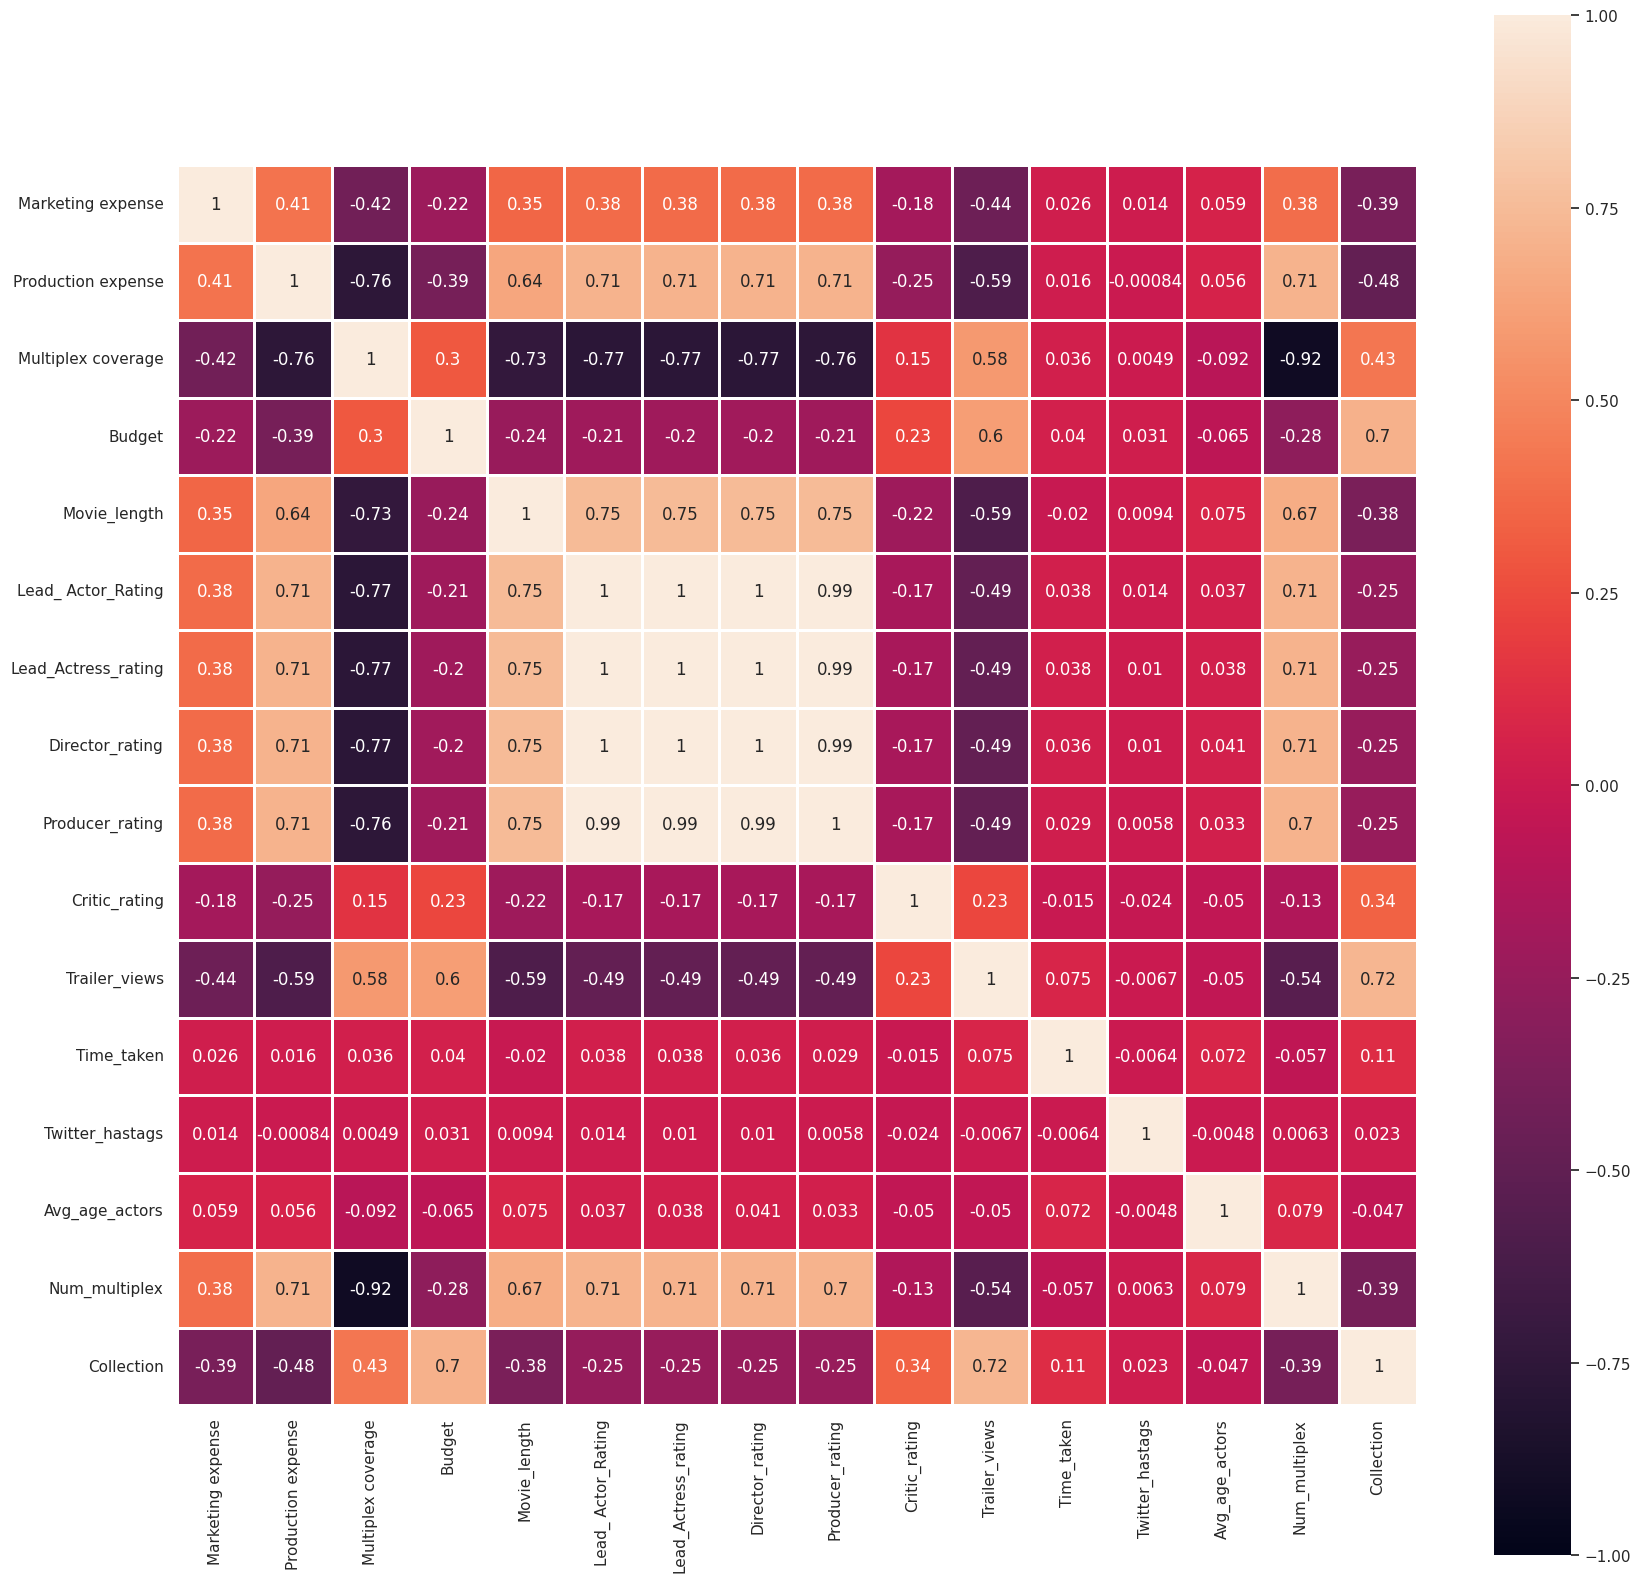

In [573]:
plt.figure(figsize=(20, 20))
# Numeric correlation
sns.heatmap(df.corr(numeric_only=True), linewidths=1, vmin=-1, vmax=1, annot=True, square=True)

In [574]:
df_num = df.copy()

In [575]:
# Converting/encoding data to numerical values.
# (e.g: 3D_Available, Genre)
from sklearn.preprocessing import LabelEncoder

laben = LabelEncoder()
obj = df_num.select_dtypes(include='object')
non_obj = df_num.select_dtypes(exclude='object')
for i in range (0, obj.shape[1]) :
    obj[obj.columns[i]] = laben.fit_transform(obj[obj.columns[i]])
df_num = pd.concat([non_obj, obj], axis = 1)
df_num.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available,Genre
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,3
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,2
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,2
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,2


### Machine Learning Models:
### Preparation:

In [576]:
# Machine Learning:
# Machine Learning Tools
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,\
     recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix

In [577]:
X = df_num.drop(['Collection','3D_available','Genre'],axis=1)
Y = pd.qcut(df_num['Collection'],
        q=[0, .5, 1],
        labels=[0, 1])

In [578]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [579]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### PCA

In [580]:
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

### LDA

In [581]:
lda = LinearDiscriminantAnalysis(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

### KNN with PCA

In [582]:
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(x_train_pca, y_train)
y_pred1 = knn_pca.predict(x_test_pca)
accuracy_pca =  accuracy_score(y_test, y_pred1)
precision = print('Precision Score: ', format(precision_score(y_test, y_pred1, pos_label=1)))
# Recall
recall = print('Sensitivity/Recall Score: ', format(recall_score(y_test, y_pred1, pos_label=1)))
# F1-score
f1score = print('F1-Measure/F1-Score: ', format(f1_score(y_test, y_pred1, pos_label=1)))
print('Accuracy PCA: '+str(accuracy_pca*100)+'%')

Precision Score:  0.8974358974358975
Sensitivity/Recall Score:  0.6730769230769231
F1-Measure/F1-Score:  0.7692307692307692
Accuracy PCA: 79.41176470588235%


In [583]:
y_pred_pca = cross_val_predict(knn_pca, x_train_pca, y_train, cv=StratifiedKFold(n_splits=5, 
                                                                                shuffle=True, 
                                                                                random_state=43))
fpr_pca, tpr_pca, _ = roc_curve(y_train, y_pred_pca, pos_label=1)
roc_auc_pca = auc(fpr_pca, tpr_pca)

### KNN with LDA

In [584]:
knn_lda = KNeighborsClassifier(n_neighbors=3)
knn_lda.fit(x_train_lda, y_train)
y_pred2 = knn_lda.predict(x_test_lda)
accuracy_lda =  accuracy_score(y_test, y_pred2)
precision = print('Precision Score: ', format(precision_score(y_test, y_pred2, pos_label=1)))
# Recall
recall = print('Sensitivity/Recall Score: ', format(recall_score(y_test, y_pred2, pos_label=1)))
# F1-score
f1score = print('F1-Measure/F1-Score: ', format(f1_score(y_test, y_pred2, pos_label=1)))
print('Accuracy LDA: '+str(accuracy_lda*100)+'%')

Precision Score:  0.9512195121951219
Sensitivity/Recall Score:  0.75
F1-Measure/F1-Score:  0.8387096774193549
Accuracy LDA: 85.29411764705883%


In [585]:
y_pred_lda = cross_val_predict(knn_lda, x_train_lda, y_train, cv=StratifiedKFold(n_splits=5,
                                                                    shuffle=True,
                                                                    random_state=43))
fpr_lda, tpr_lda, threshold = roc_curve(y_train, y_pred_lda, pos_label=1)
roc_auc_lda = auc(fpr_lda, tpr_lda)

### KNN with SVD

In [586]:
x_train_svd = sc.fit_transform(x_train)
x_test_svd = sc.transform(x_test)

U, S, VT = np.linalg.svd(x_train_svd, full_matrices=False)

num_components = 6
X_train_svd = np.dot(U[:, :num_components], np.diag(S[:num_components]))
X_test_svd = np.dot(x_test_svd, VT.T[:, :num_components])

In [587]:
knn_svd = KNeighborsClassifier(n_neighbors=3)
knn_svd.fit(x_train_svd, y_train)
y_pred4 = knn_svd.predict(x_test_svd)
accuracy_svd =  accuracy_score(y_test, y_pred4)
precision = print('Precision Score: ', format(precision_score(y_test, y_pred4, pos_label=1)))
# Recall
recall = print('Sensitivity/Recall Score: ', format(recall_score(y_test, y_pred4, pos_label=1)))
# F1-score
f1score = print('F1-Measure/F1-Score: ', format(f1_score(y_test, y_pred4, pos_label=1)))
print('Accuracy SVD: '+str(accuracy_svd*100)+'%')

Precision Score:  0.8222222222222222
Sensitivity/Recall Score:  0.7115384615384616
F1-Measure/F1-Score:  0.7628865979381444
Accuracy SVD: 77.45098039215686%


In [588]:
y_pred_svd = cross_val_predict(knn_svd, x_train_svd, y_train, cv=StratifiedKFold(n_splits=5,
                                                                    shuffle=True,
                                                                    random_state=43))
fpr_svd, tpr_svd, threshold = roc_curve(y_train, y_pred_svd, pos_label=1)
roc_auc_svd = auc(fpr_svd, tpr_svd)

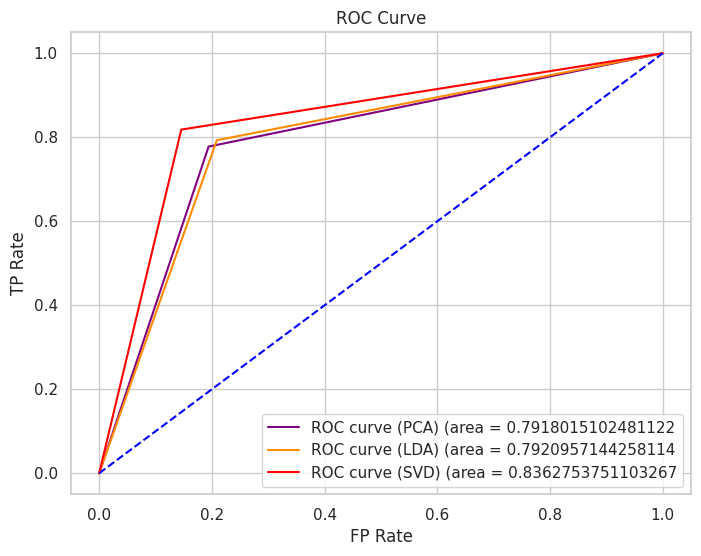

In [589]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, color='purple', label='ROC curve (PCA) (area = '+str(roc_auc_pca))
plt.plot(fpr_lda, tpr_lda, color='darkorange', label='ROC curve (LDA) (area = '+str(roc_auc_lda))
plt.plot(fpr_svd, tpr_svd, color='red', label='ROC curve (SVD) (area = '+str(roc_auc_svd))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Standard KNN (Classifier)

In [590]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred3 = knn.predict(x_test)
print(y_pred3[:10])
print('Accuracy:', accuracy_score(y_test, y_pred3))
# Precision
precision = print('Precision Score: ', format(precision_score(y_test, y_pred3, pos_label=1)))
# Recall
recall = print('Sensitivity/Recall Score: ', format(recall_score(y_test, y_pred3, pos_label=1)))
# F1-score
f1score = print('F1-Measure/F1-Score: ', format(f1_score(y_test, y_pred3, pos_label=1)))

[0 0 1 1 0 0 0 1 0 1]
Accuracy: 0.7745098039215687
Precision Score:  0.8222222222222222
Sensitivity/Recall Score:  0.7115384615384616
F1-Measure/F1-Score:  0.7628865979381444


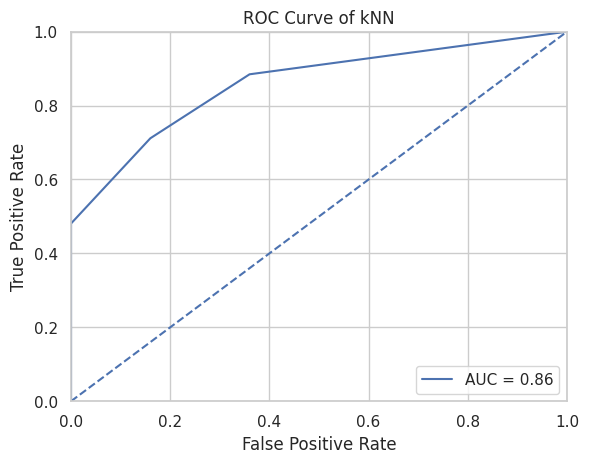

In [591]:
y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

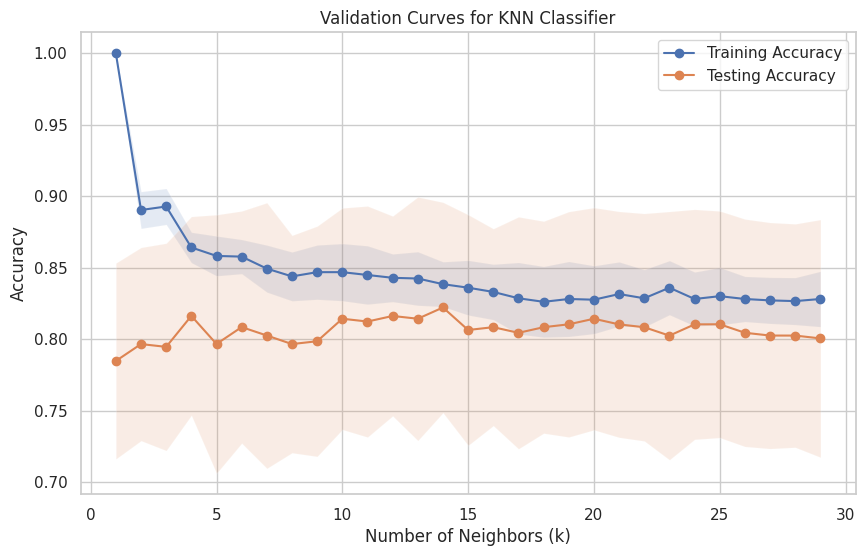

In [592]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 30)

# Use validation_curve to generate validation curves for a KNN classifier
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, Y, param_name='n_neighbors', param_range=param_range,
    cv=5, scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot validation curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(param_range, test_mean, label='Testing Accuracy', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Curves for KNN Classifier')
plt.legend()
plt.show()

### Confusion Matrix Heatmap

Confusion Matrix for Prediction: 1
[[46  4]
 [17 35]]
Confusion Matrix for Prediction: 2
[[48  2]
 [13 39]]
Confusion Matrix for Prediction: 3
[[42  8]
 [15 37]]
Confusion Matrix for Prediction: 4
[[42  8]
 [15 37]]


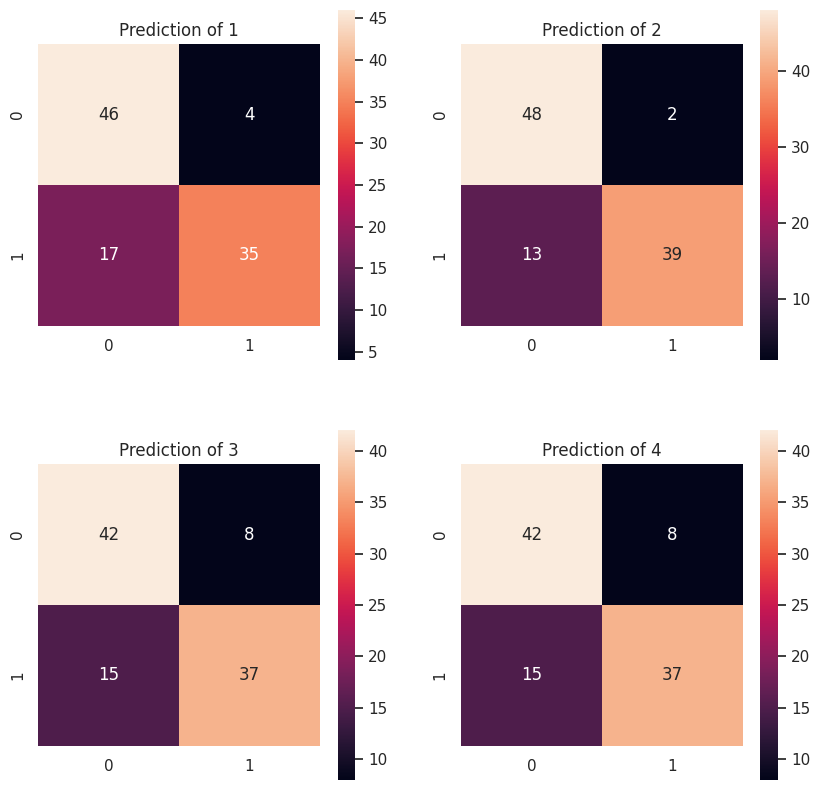

In [593]:
plt.figure(figsize=(10,10))
for i, pred in enumerate([y_pred1,y_pred2,y_pred3, y_pred4]):
    cf = confusion_matrix(y_test, pred)
    print("Confusion Matrix for Prediction: "+str(i+1))
    print(cf)
    plt.subplot(2, 2, i + 1)
    sns.heatmap(cf, annot=True, square=True)
    plt.title("Prediction of "+str(i+1))
plt.show()

In [594]:
X2 = df_num.drop(['Collection','3D_available','Genre'],axis=1)
Y2 = pd.qcut(df_num['Collection'],
        q=[0, .5, 1],
        labels=[0, 1])
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=43)

### Neural Networks

In [595]:
X2

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607


In [596]:
Y2

0      1
1      1
2      1
3      1
4      1
      ..
501    1
502    0
503    1
504    1
505    0
Name: Collection, Length: 506, dtype: category
Categories (2, int64): [0 < 1]

In [597]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(x_train_scaled, y_train, epochs=10, batch_size=8, validation_split=0.2)

accuracy = model.evaluate(x_test_scaled, y_test)[1]
print("Test Accuracy:", accuracy)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 1024)              16384     
                                                                 
 dense_57 (Dense)            (None, 512)               524800    
                                                                 
 dense_58 (Dense)            (None, 256)               131328    
                                                                 
 dense_59 (Dense)            (None, 1)                 257       
                                                                 
Total params: 672769 (2.57 MB)
Trainable params: 672769 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
41/41 [==============================] - 2s 7ms/step - loss: 0.4401 - accuracy: 0.8050 - val_loss: 0.3486 - val_accuracy: 0.8765
Epoch 2/1

In [598]:
X2 = df_num.drop(['Collection','3D_available','Genre'],axis=1)
Y2 = df_num['Collection']
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=43)

## Regression
### Standard KNN (Regressor)

In [599]:
from sklearn.neighbors import KNeighborsRegressor

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Euclidean distance metric
knn = KNeighborsRegressor(n_neighbors=7, metric='euclidean')

knn.fit(x_train, y_train)
y_pred3 = knn.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 6898.0392156862745
Mean Squared Error: 118131412.56502606
Root Mean Squared Error: 10868.827561656595


In [600]:
# Manhattan distance metric
knn = KNeighborsRegressor(n_neighbors=7, metric='manhattan')
knn.fit(x_train, y_train)
y_pred4 = knn.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred4)))

Mean Absolute Error: 7085.994397759105
Mean Squared Error: 125210108.04321724
Root Mean Squared Error: 11189.732259675262


In [601]:
# Cosine distance metric 
knn = KNeighborsRegressor(n_neighbors=7, metric='cosine')
knn.fit(x_train, y_train)
y_pred5 = knn.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred5))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 7223.529411764704
Mean Squared Error: 115955214.08563428
Root Mean Squared Error: 10768.250279670987


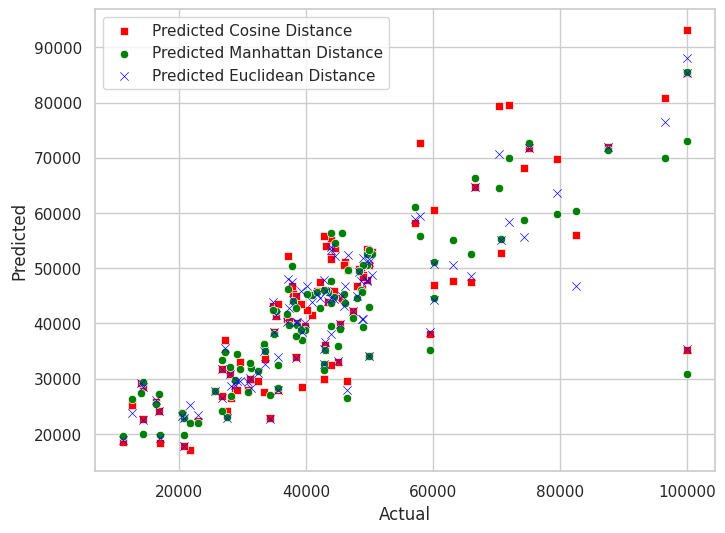

In [602]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x=y_test, y=y_pred5, color= 'red', label='Predicted Cosine Distance', marker='s')
sns.scatterplot(x=y_test, y=y_pred4, color= 'green', label='Predicted Manhattan Distance', marker='o')
sns.scatterplot(x=y_test, y=y_pred3, color= 'blue', label='Predicted Euclidean Distance', marker='x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

## Classification:

#### Binning the numerical data:

In [603]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,30.921101,104.779133,12.513697,106.332889,18364.351764
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.690000,223.796000,28.000000,465.000000,34050.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,158.980000,254.400000,39.000000,535.500000,42400.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.520000,283.416000,50.000000,614.750000,50000.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000


In [604]:
# Copy to be binned (numerical -> categorical)
df_bin = df.copy()

In [605]:
df_bin['Budget_Category'] = pd.qcut(df_bin['Budget'],
        q=[0, .25, .5, .75, 1],
        labels=['A', 'B', 'C', 'D'])

In [606]:
df_bin[['Budget', 'Budget_Category']].sample(5)

,Budget,Budget_Category
288,35079.825,C
54,32707.840,B
375,40623.715,D
312,33457.765,B
280,43440.100,D


In [607]:
df_bin['Movie_Length_Category'] = pd.qcut(df_bin['Movie_length'],
        q=[0, .33, .66, 1],
        labels=['Short', 'Medium', 'Long'])
df_bin['Actor_Rating_Category'] = pd.qcut(df_bin['Lead_ Actor_Rating'],
        q=[0, .4, .8, 1],
        labels=['Bad', 'Good', 'Excellent'])
df_bin['Actress_Rating_Category'] = pd.qcut(df_bin['Lead_Actress_rating'],
        q=[0, .4, .8, 1],
        labels=['Bad', 'Good', 'Excellent'])
df_bin['Director_Rating_Category'] = pd.qcut(df_bin['Director_rating'],
        q=[0, .4, .8, 1],
        labels=['Bad', 'Good', 'Excellent'])
df_bin['Producer_Rating_Category'] = pd.qcut(df_bin['Producer_rating'],
        q=[0, .4, .8, 1],
        labels=['Bad', 'Good', 'Excellent'])
df_bin['Critic_Rating_Category'] = pd.qcut(df_bin['Critic_rating'],
        q=[0, .4, .8, 1],
        labels=['Bad', 'Good', 'Excellent'])
df_bin['Collection_Category'] = pd.qcut(df_bin['Collection'],
        q=[0, .5, 1],
        labels=['Failure', 'Success'])

In [608]:
df_bin = df_bin.iloc[:, 26-8:]
df_bin.sample(5)

,Budget_Category,Movie_Length_Category,Actor_Rating_Category,Actress_Rating_Category,Director_Rating_Category,Producer_Rating_Category,Critic_Rating_Category,Collection_Category
172,A,Medium,Good,Good,Good,Good,Bad,Success
84,C,Short,Bad,Bad,Bad,Bad,Bad,Success
184,A,Long,Good,Good,Good,Good,Excellent,Success
130,C,Long,Good,Good,Good,Good,Bad,Failure
376,D,Long,Excellent,Excellent,Excellent,Excellent,Good,Failure


In [609]:
df_bin2 = df_bin.copy()
df_bin = df_bin['Collection_Category']

#### Bayesian Belief Networks

#### Naive Bayesian

In [610]:
X3 = df.drop(columns=['Collection','Genre','3D_available'], axis=1)
Y3 = df_bin

x_train, x_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=43)

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

# Accuracy
accuracy = print('Accuracy Score: ', format(accuracy_score(y_test, nb_pred)))
# Precision
precision = print('Precision Score: ', format(precision_score(y_test, nb_pred, pos_label='Success')))
# Recall
recall = print('Sensitivity/Recall Score: ', format(recall_score(y_test, nb_pred, pos_label='Success')))
# F1-score
f1score = print('F1-Measure/F1-Score: ', format(f1_score(y_test, nb_pred, pos_label='Success')))

# AUC & CV
y_scores = nb.predict_proba(x_test)
fpr_nb, tpr_nb, threshold = roc_curve(y_test, y_scores[:, 1], pos_label="Success")
roc_auc_nb = auc(fpr_nb, tpr_nb)

Accuracy Score:  0.7549019607843137
Precision Score:  0.7647058823529411
Sensitivity/Recall Score:  0.75
F1-Measure/F1-Score:  0.7572815533980582


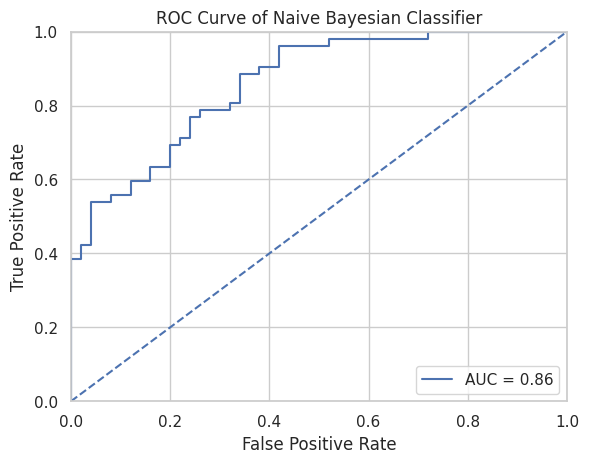

In [611]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.2f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayesian Classifier')
plt.show()

In [612]:
from sklearn.metrics import classification_report
c_rep = print('Report: \n', format(classification_report (y_test, nb_pred)))

Report: 
               precision    recall  f1-score   support

     Failure       0.75      0.76      0.75        50
     Success       0.76      0.75      0.76        52

    accuracy                           0.75       102
   macro avg       0.75      0.76      0.75       102
weighted avg       0.76      0.75      0.75       102



<Axes: >

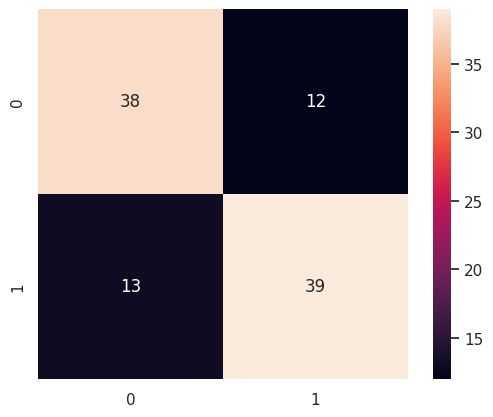

In [613]:
nb_cf = confusion_matrix(y_test, nb_pred)
nb_cf
sns.heatmap(nb_cf, annot=True, square=True)

#### Decision Tree

In [614]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
# Accuracy
accuracy = print('Accuracy Score: ', format(accuracy_score(y_test, dt_pred)))
# Precision
precision = print('Precision Score: ', format(precision_score(y_test, dt_pred, pos_label='Success')))
# Recall
recall = print('Sensitivity/Recall Score: ', format(recall_score(y_test, dt_pred, pos_label='Success')))
# F1-score
f1score = print('F1-Measure/F1-Score: ', format(f1_score(y_test, dt_pred, pos_label='Success')))
# AUC & CV
y_scores = dt.predict_proba(x_test)
fpr_dt, tpr_dt, threshold = roc_curve(y_test, y_scores[:, 1], pos_label="Success")
roc_auc_dt = auc(fpr_dt, tpr_dt)

Accuracy Score:  0.7745098039215687
Precision Score:  0.9393939393939394
Sensitivity/Recall Score:  0.5961538461538461
F1-Measure/F1-Score:  0.7294117647058823


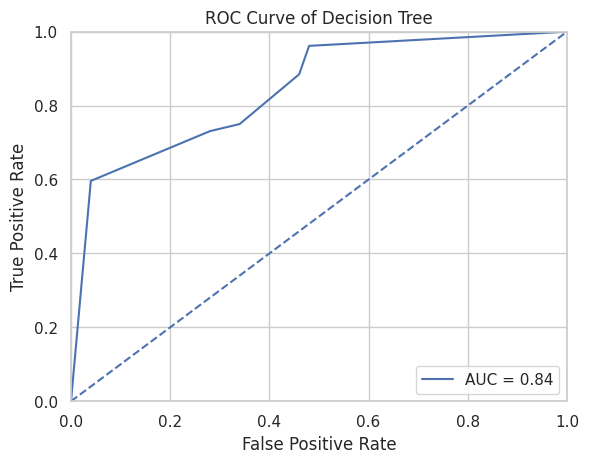

In [615]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_dt, tpr_dt, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

<Axes: >

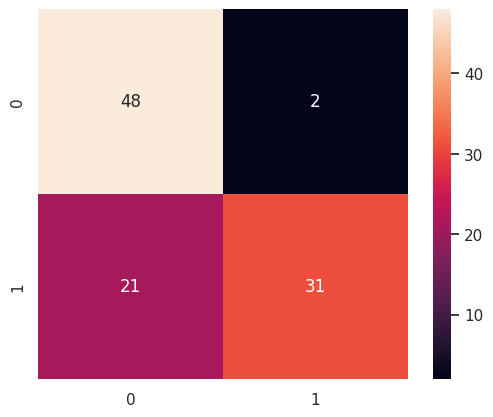

In [616]:
dt_cf = confusion_matrix(y_test, dt_pred)
dt_cf

ax= plt.subplot()
sns.heatmap(dt_cf, annot=True, square=True, ax=ax)

In [617]:
!pip install pydotplus

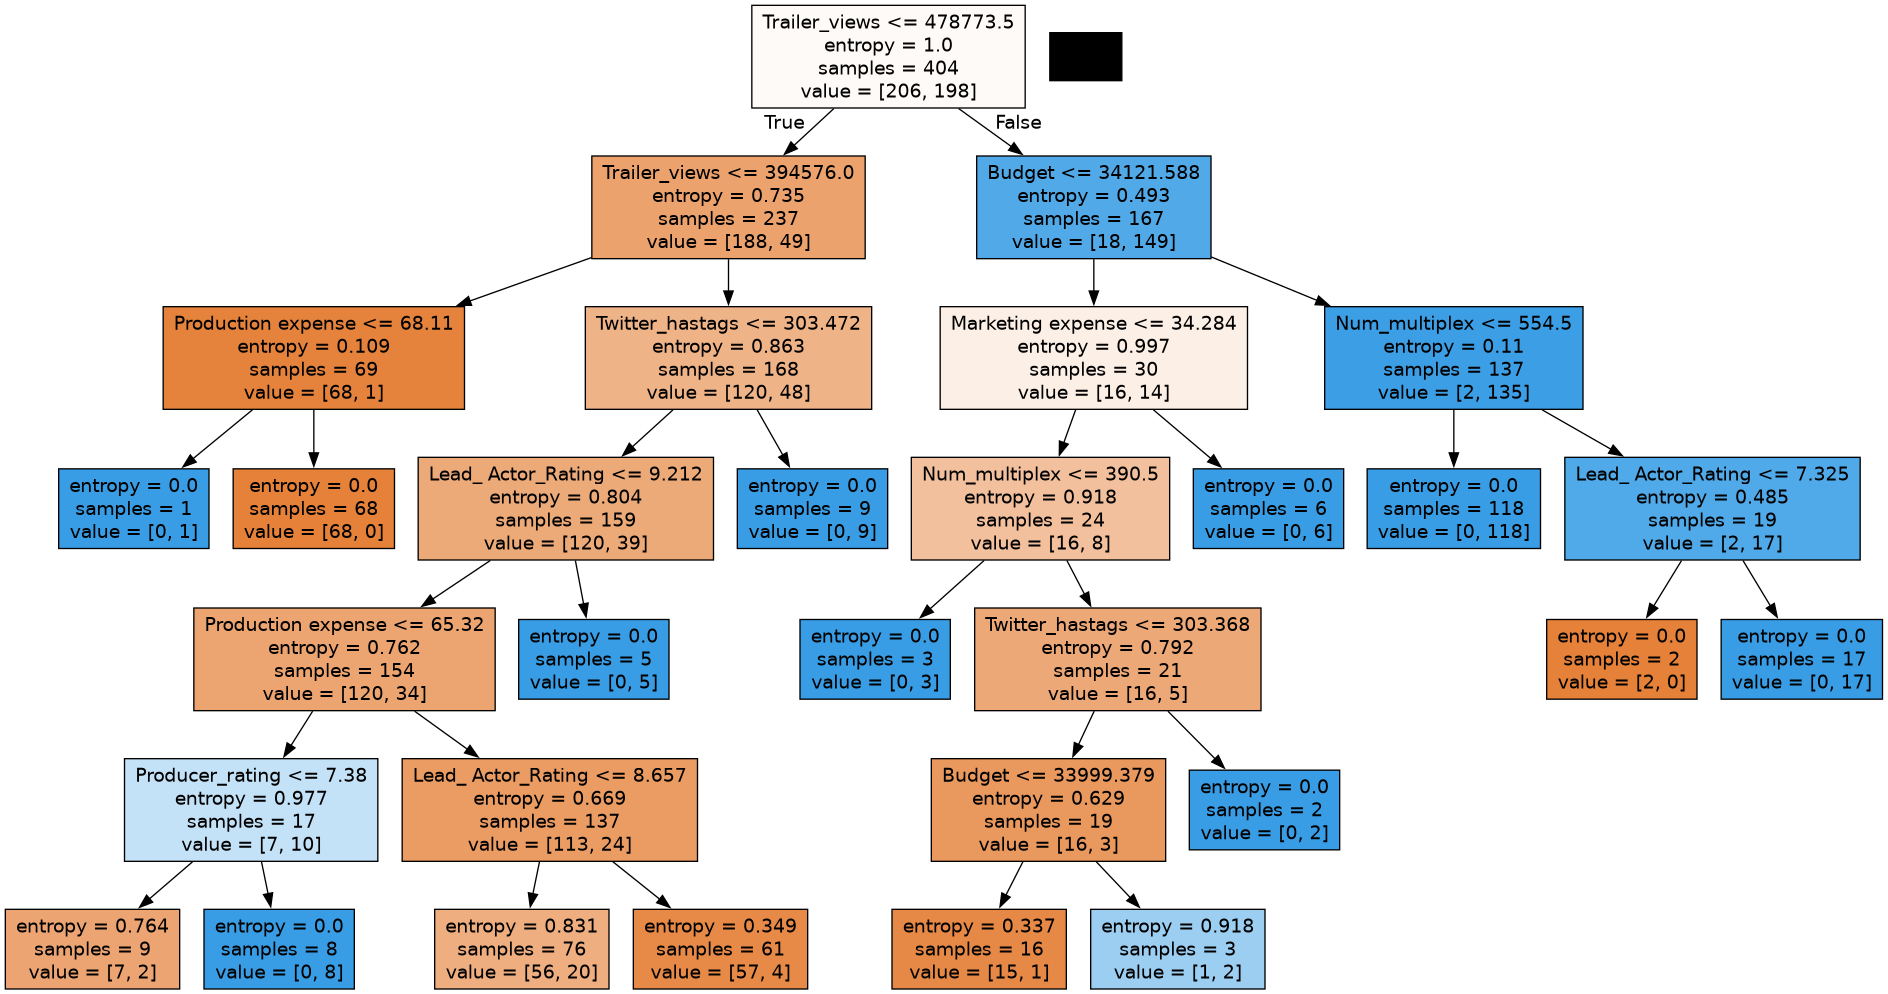

In [618]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data=export_graphviz(dt, out_file=None, feature_names=x_train.columns, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Linear Discriminant Analysis Classifier:

In [619]:
# Linear Discriminant Analysis (as a classifier)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_pred = lda.predict(x_test)
# Accuracy
accuracy = print('Accuracy Score: ', format(accuracy_score(y_test, lda_pred)))
# Precision
precision = print('Precision Score: ', format(precision_score(y_test, lda_pred, pos_label='Success')))
# Recall
recall = print('Sensitivity/Recall Score: ', format(recall_score(y_test, lda_pred, pos_label='Success')))
# F1-score
f1score = print('F1-Measure/F1-Score: ', format(f1_score(y_test, lda_pred, pos_label='Success')))

Accuracy Score:  0.8235294117647058
Precision Score:  0.8863636363636364
Sensitivity/Recall Score:  0.75
F1-Measure/F1-Score:  0.8125000000000001


## References:

- [1] Dey, S. (2018). Predicting Gross Movie Revenue. arXiv preprint arXiv:1804.03565.
- [2] Madongo, C. T., & Zhongjun, T. (2023). A movie box office revenue prediction model based on deep multimodal features. Multimedia Tools and Applications, 1-29.
- [3] Chen, A. W. (2018). A statistical analysis of gross revenue in movie industry. International Journal of Business Management and Economic Research (IJBMER), 9(3), 1276-1280.
- [4] Ahmad, I. S., Bakar, A. A., & Yaakub, M. R. (2020). Movie revenue prediction based on purchase intention mining using YouTube trailer reviews. Information Processing & Management, 57(5), 102278.
- [5] Wang, D., Wu, Y., Gu, C., Wang, Y., Zhu, X., Zhou, W., & Lin, X. M. (2022). A movie box office revenues prediction algorithm based on human-machine collaboration feature processing. Journal of Engineering Research.
- [6] Hao, B. (2023). The Analysis of the Factors that Influence the Film Revenue. Highlights in Science, Engineering and Technology, 47, 154-159.
- [7] Wang, Z., Zhang, J., Ji, S., Meng, C., Li, T., & Zheng, Y. (2020). Predicting and ranking box office revenue of movies based on big data. Information Fusion, 60, 25-40.
- [8] Gao, Z., Malic, V., Ma, S., & Shih, P. (2019). How to make a successful movie: factor analysis from both financial and critical perspectives. In Information in Contemporary Society: 14th International Conference, iConference 2019, Washington, DC, USA, March 31–April 3, 2019, Proceedings 14 (pp. 669-678). Springer International Publishing.
- [9] Kharb, L., Chahal, D., & Vagisha. (2020). Forecasting Movie Rating Through Data Analytics. In Data Science and Analytics: 5th International Conference on Recent Developments in Science, Engineering and Technology, REDSET 2019, Gurugram, India, November 15–16, 2019, Revised Selected Papers, Part II 5 (pp. 249-257). Springer Singapore.
- [10] Murschetz, P. C., Bruneel, C., Guy, J. L., Haughton, D., Lemercier, N., McLaughlin, M. D., ... & Bakhtawar, B. (2020). Movie Industry Economics: How Data Analytics Can Help Predict Movies’ Financial Success. Nordic Journal of Media Management, 1(3), 339-359.